# ALDS Tutorial 1: time complexity, en het meten van runtime in de praktijk

Welkom bij de eerste tutorial van ALDS! In deze tutorial gaan wij kijken naar de time-complexity van algoritmes.  Ook gaan de runtime en het aantal function calls bij recursie doormeten, en deze vergelijken met de complexity-resultaten. We moeten daarbij in acht nemen dat de complixiteitsanalyse uitgaat van worst-case input, en dat metingen in de praktijk sterk zullen afhangen van de data (vaak gegenereerd) die we gebruiken om de meting te doen. 

Er wordt steeds eerst uitleg en voorbeeldcode gegeven. Daarna volgen opgaven. Die zijn duidelijk gemarkeerd. 

Laten we eerst even beginnen met het controleren van de installatie. Als het goed is moet je by IPython dezelfde versie krijgen van Python als die die je krijgt als je op de command line Python3 start. Zo nee, update Jupyter dan (of herinstalleer deze) aangezien het niet automatisch de nieuwste python-installatie op je systeem gebruikt. Dit kan erg vervelend worden als je libraries wil gebruiken die je nu nog wil toevoegen.  

LET OP: bij IPython notebooks, zoals deze, is het belangrijk om de **cellen** allemaal uit te voeren. Dit door je voor een individuele cell met SHIFT+ENTER. Als je meerdere cellen (in volgorde) uit wil voeren, staan er verschillende opties onder het dropmenu "cell", zoals bijvoorbeeld "Run All Above" (een van mijn persoonlijke favorieten). Succes!

~ DMYR

In [1]:
import sys
assert sys.version_info.major == 3, "You need python 3." #Asserts zijn handig: ingebouwde unit-testjes in Python
print("Python version is {} -> okay".format(sys.version_info[0:30]))

import IPython
assert IPython.version_info[0] >= 7, "You need IPython >= 7"
print("IPython version is {} -> okay".format(IPython.version_info))

Python version is (3, 8, 3, 'final', 0) -> okay
IPython version is (7, 16, 1, '') -> okay


Alles oké? Mooi laten we dan doorgaan met het importeren van libraries, en een aantal functies definiëren die we gaan gebruiken om mooie plotjes te maken en metingen te doen.

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats

#numpy arrays zijn daadwerkelijk arrays, geen Python lists, dus die gebruiken we.
def random_int_array(length):
    array = np.random.randint(0, high=100, size=length, dtype='l') #een array'tje met ints tussen de 0 en de 100 (exclusief)
    return array

def my_max(int_array): #Deze functie implementeert het max1 algoritme uit de reader
    result = int_array[0] #in de reader staat min oneindig, maar dit werkt ook en is eigenlijk beter => implementatiedetail
    l = len(int_array)
    for i in range(l):
        result = result if int_array[i]<=result else int_array[i] #de ternary operator in Python is bijna natuurlijke taal 
    return result                                                 #de ? ziet er wel mooier uit :P

#En even een klein testje
arr = random_int_array(5)
assert max(arr) == my_max(arr), "Hé, die implementatie klopt niet, maat!"
print(str(max(arr))+"=="+str(my_max(arr))+", inderdaad!")  

t1 = time.time()
res = max(arr)
t2 = time.time()
print("De standaard max deed er "+str(t2-t1)+"s over.")
t1 = time.time()
res = my_max(arr)
t2 = time.time()
print("Onze max1-implementatie deed er "+str(t2-t1)+"s over")
print("Hé onze implementatie lijkt (ten minste op mijn machine) wel iets sneller \n-- voor de meeste random seeds dan... apart?!")
t1 = time.time()
res = np.max(arr)
t2 = time.time()
print("De numpy library heeft ook nog een max, die deed er "+str(t2-t1)+"s over. Hè, weer anders?!")
print("Maar goed, één meting is natuurlijk nog geen bewíj́s. \nEn we hebben bovendien maar één lengte getest. Dat kan beter!")

84==84, inderdaad!
De standaard max deed er 0.0s over.
Onze max1-implementatie deed er 0.0005033016204833984s over
Hé onze implementatie lijkt (ten minste op mijn machine) wel iets sneller 
-- voor de meeste random seeds dan... apart?!
De numpy library heeft ook nog een max, die deed er 0.0004980564117431641s over. Hè, weer anders?!
Maar goed, één meting is natuurlijk nog geen bewíj́s. 
En we hebben bovendien maar één lengte getest. Dat kan beter!


In de vorige cell hebben we de implementatie van max1 met maar één metinkje vergeleken met de standaard python max, en de standaard numpy max. Dat is alleen natuurlijk niet echt een nette manier om runtime te meten. Eigenlijk moeten we dit netjes systematisch aanpakken. Dat wil zeggen:
* Meerdere metingen doen
* Voor meerdere inputgroottes (in dit geval de lengte van de array) 
* En zowel het gemiddelde, als de standaardafwijking (=standaarddeviatie) bekijken

De standaardafwijking is hoeveel een meting gemiddeld van het gemiddelde afwijkt. 

De onderstaande code maakt zo'n systematische vergelijking tussen de runtimes van de twee algoritmes. Let op dat: 
* De twee functies worden vergeleken op verschillende groottes arrays (die in "meetpunten") staan. Specifiek: van 5 tot en met 250 in stappen van 5.
* De twee functies altijd op **dezelfde** input vergeleken worden. Dit is nodig, want anders is de vergelijking minder eerlijk. 
* We de functie time.time() gebruiken om de meting te doen. Deze geeft de tijd in seconden, maar gelukkig niet afgerond op hele seconden. Hij is vrij precies. 
* We zowel de gemiddelden (mean) van beide algoritmes uitrekenen, als de standaarddeviatie. Dit plotten we als een error region (tussen het gemiddelde min, en het gemiddelde plus, de standaardafwijking). Zo kunnen we makkelijk een indruk krijgen van of de verschillen tussen de algoritmes wel significant zijn. 
* We gebruiken de statistics library (hierboven geïmporteerd als "stats") voor deze statistische functions. 
* De plotcode is met matplotlib.pyplot gemaakt (geïmporteerd als "plt"). Voor meer info over deze library, zie: https://matplotlib.org/tutorials/introductory/pyplot.html 
* We zetten altijd op de assen wat we tegen elkaar afzetten, en we voegen een legenda toe aan het plaatje. 


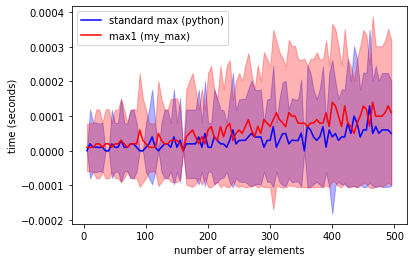

Ah, kennelijk was onze implementatie toch niet echt sneller... 
Voor hele kleine arrays doet hij het misschien net ietsje beter, maar zeker niet voor grotere inputs.


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats

#numpy arrays zijn daadwerkelijk arrays, geen Python lists, dus die gebruiken we.
def random_int_array(length):
    array = np.random.randint(0, high=100, size=length, dtype='l') #een array'tje met ints tussen de 0 en de 100 (exclusief)
    return array

def my_max(int_array): #Deze functie implementeert het max1 algoritme uit de reader
    result = int_array[0] #in de reader staat min oneindig, maar dit werkt ook en is eigenlijk beter => implementatiedetail
    l = len(int_array)
    for i in range(l):
        result = result if int_array[i]<=result else int_array[i] #de ternary operator in Python is bijna natuurlijke taal 
    return result 

mean_std_max=[]
stdev_std_max=[]
mean_my_max=[]
stdev_my_max=[]
meetpunten = list(range(5,500,5))
for i in meetpunten:
    std =[]
    my = []
    for j in range(50): #vijftig metingen per datapunt
        arr = random_int_array(i)
        t1 = time.time()
        res = max(arr)
        t2 = time.time()
        std.append(t2-t1)
        t1 = time.time()
        res = my_max(arr)
        t2 = time.time()
        my.append(t2-t1)
    mean_std_max.append(stats.mean(std))
    stdev_std_max.append(stats.stdev(std))
    mean_my_max.append(stats.mean(my))
    stdev_my_max.append(stats.stdev(my))
    
#En dan de plot-code gemaakt met Matplotlib
#Zie bijvoorbeeld de tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html
plt.plot(meetpunten, mean_std_max, 'b-')
plt.fill_between(meetpunten, np.array(mean_std_max)-np.array(stdev_std_max), np.array(mean_std_max)+np.array(stdev_std_max), color='b', alpha=0.3)
plt.plot(meetpunten, mean_my_max, 'r-')
plt.fill_between(meetpunten, np.array(mean_my_max)-np.array(stdev_my_max), np.array(mean_my_max)+np.array(stdev_my_max), color='r', alpha=0.3)
plt.xlabel("number of array elements")
plt.ylabel("time (seconds)")
plt.legend(["standard max (python)", "max1 (my_max)"], loc='upper left')
plt.show()

print("Ah, kennelijk was onze implementatie toch niet echt sneller... \nVoor hele kleine arrays doet hij het misschien net ietsje beter, maar zeker niet voor grotere inputs.")

Wat opvalt in de plot hierboven, is dat beide implementaties (de standaard Python max en my_max) een runtime hebben die lineair groeit met de grootte van de input. Beide implementaties implementeren dan ook een algoritme met een complexity van O(n). Het enige verschil is de constante voor de n, die we negeren bij runtime analyses. Dat is ook logisch, want de standaardmax en onze max1-implementatie zijn beide hetzelfde algoritme. Alleen maakt de standaard-max gebruik van een iterable, en is daardoor ietsje sneller voor grotere arrays. De reden dat hij in het begin misschien ietsje langzamer is is omdat de Python max allemaal fancy opties heeft die eerst even moeten worden afgevangen (in constante tijd): https://docs.python.org/3/library/functions.html#max   

## Opgave 1: Dat kan slechter

Implementeer de functie max2 (Algorithm 2) uit hoofdstuk 2 van de reader (https://canvas.hu.nl/courses/20230/files/1265942?module_item_id=430200), in de cell hieronder. Maak vervolgens een runtimevergelijkingsplot met max1 (my_max, zoals hierboven geïmplementeerd), op dezelfde manier als de code hierboven (vergeet niet de legenda aan te passen). 

Komt de plot overeen met je verwachting, gezien de runtime complexity van max2? (Graag beantwoorden in text (de markdown cell) onder je plotje.)

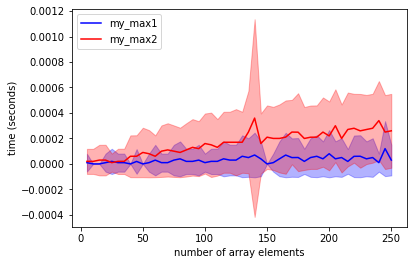

In [10]:
#Schrijf hier je code voor opgave 1
from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats

def random_int_array(length):
    array = np.random.randint(0, high=100, size=length, dtype='l') #een array'tje met ints tussen de 0 en de 100 (exclusief)
    return array

def my_max2(arr):
    for i in range(0, len(arr)):
        maxFound = True
        for j in range(0, len(arr)):
            if(arr[j] > arr[i]):
                maxFound = False
                break
        if maxFound:
            return arr[i];

def my_max(int_array): #Deze functie implementeert het max1 algoritme uit de reader
    result = int_array[0] #in de reader staat min oneindig, maar dit werkt ook en is eigenlijk beter => implementatiedetail
    l = len(int_array)
    for i in range(l):
        result = result if int_array[i]<=result else int_array[i] #de ternary operator in Python is bijna natuurlijke taal 
    return result             
        
mean_std_max=[]
stdev_std_max=[]
mean_my_max=[]
stdev_my_max=[]
meetpunten = list(range(5,251,5))
for i in meetpunten:
    std =[]
    my = []
    for j in range(50): 
        arr = random_int_array(i)
        t1 = time.time()
        res = my_max(arr)
        t2 = time.time()
        std.append(t2-t1)
        t1 = time.time()
        res = my_max2(arr)
        t2 = time.time()
        my.append(t2-t1)
    mean_std_max.append(stats.mean(std))
    stdev_std_max.append(stats.stdev(std))
    mean_my_max.append(stats.mean(my))
    stdev_my_max.append(stats.stdev(my))
    
plt.plot(meetpunten, mean_std_max, 'b-')
plt.fill_between(meetpunten, np.array(mean_std_max)-np.array(stdev_std_max), np.array(mean_std_max)+np.array(stdev_std_max), color='b', alpha=0.3)
plt.plot(meetpunten, mean_my_max, 'r-')
plt.fill_between(meetpunten, np.array(mean_my_max)-np.array(stdev_my_max), np.array(mean_my_max)+np.array(stdev_my_max), color='r', alpha=0.3)
plt.xlabel("number of array elements")
plt.ylabel("time (seconds)")
plt.legend(["my_max1", "my_max2"], loc='upper left')
plt.show()

*beantwoordt hier de vraag van opgave 1*
my_max2 heeft een complexiteit van n^2 ten opzichte van my_max1 die een complexiteit heeft van n. In de grafiek is dit ook wel te zien, je ziet dat my_max2 aanzienlijk langer duurt, hij wordt ook steeds langer naarmate de array meer elementen krijgt. Dit is te verwachten bij een complexiteit van n^2.

## Opgave 2: Dat kan in verwachting beter, maar niet worst-case

In Python zit een standaard find-functie, d.w.z., een functie die de index van een gegeven waarde in een lijst teruggeeft: https://www.programiz.com/python-programming/methods/list/index
Dat is de functie **index** die hoort bij de class **list**. Deze functie is echter niet altijd even handig. Hij doet het ten eerste alleen op lijsten, en ten tweede, hij throwt een error als het de waarde er niet inzit. Vaak willen we dat niet, en gewoon een -1 returnen als de waarde er niet inzit.

Nu kunnen we daar natuurlijk best een lelijke hack voor maken en toch gebruik maken van de standaardimplementatie. 

In [16]:
def std_find(x, array):
    lst = list(array)
    try: 
        i=lst.index(x)
    except:
        i=-1
    return i
std_find(9, np.array([1,3,4]))

assert std_find(9, np.array([1,3,4])) == -1, "Nee, die zit er niet in..."
assert std_find(4, np.array([1,3,4])) == 2, "Nee, die zit er juist wel in..."

Maar dat kunnen we natuurlijk ook niet doen... 

Implementeer een algoritme voor ***find***, dat de index van de éérste keer dat x in een array zit (dus de laagste index waarvoor array[index] == x) teruggeeft als x er daadwerkelijk inzit, en -1 als x er niet inzit. Je mag hierbij géén gebruik maken van standaard- en library-functies. Tip: let goed op dat je optijd returnt!

Wat is de time complexity van je algoritme (in big-Oh notatie)? Leg dit antwoord uit

Voer vervolgens twee testen uit, en plot daarvan de resultaten (met matplotlib, zoals hierboven gedaan voor max): 
* één test voor het vinden van een x tussen de 1 en de 99 (die er dus in kan zitten) in arrays gemaakt met functie random_int_array(i) (zoals hierboven gedefiniëerd). Variëer de lengtes van de array vanaf 5, en tot minstens 1000. Vergeet daarbij niet de meting te herhalen en zowel  
* doe vervolgens nog een test volgens dezelfde meting als hierboven maar nu voor de *worst case*, in plaats van een integer tussen de 1 en de 99. Leg je beredenering uit voor wat de worst case is. 

Wat is de reden voor de verschillen die je ziet tussen de eerste en de tweede meting? 


(PS: voor degene die zich afvraagt hoe die Python-standaard en library functies eigenlijk zo snel zijn; er zit stiekem een hoop geoptimaliseerde code onder, vaak nog in C++ geschreven ook. Voor een heel mooi voorbeeld hiervan kan je proberen om deze opgave nogmaals te doen gebruik makend van de library functie np.where(array==x) (ja, ik weet het, rare syntax); je slaat stijl achterover hoe snel dat is.) 

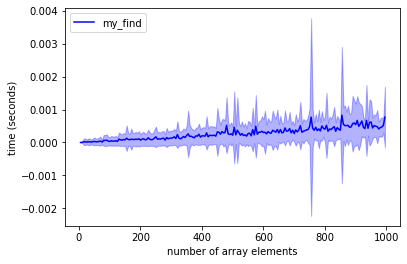

In [1]:
#schrijf hier je code voor opgave 2
from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats
from random import randint

def random_int_array(length):
    array = np.random.randint(0, high=100, size=length, dtype='l') #een array'tje met ints tussen de 0 en de 100 (exclusief)
    return array

def my_find(x, array):
    for i in range(0, len(array)):
        if(array[i] == x):
            return x
    return -1

mean_my_find=[]
stdev_my_find=[]
meetpunten = list(range(5,1000,5))
for i in meetpunten:
    std =[]
    for j in range(50): 
        arr = random_int_array(i)
        arr[len(arr)-1] = 120     #haal deze regel weg voor test 1
        t1 = time.time()
        res = my_find(120, arr)   #verander deze regel naar : res = my_find(randint(1,99), arr) voor test 1
        t2 = time.time()
        std.append(t2-t1)
    mean_my_find.append(stats.mean(std))
    stdev_my_find.append(stats.stdev(std))
    
plt.plot(meetpunten, mean_my_find, 'b-')
plt.fill_between(meetpunten, np.array(mean_my_find)-np.array(stdev_my_find), np.array(mean_my_find)+np.array(stdev_my_find), color='b', alpha=0.3)
plt.xlabel("number of array elements")
plt.ylabel("time (seconds)")
plt.legend(["my_find"], loc='upper left')
plt.show()

De Worst Case Scenario is als het getal wat je wilt zoeken het getal is wat niet in de lijst staat. De random array generator maakt een array met ints tussen de 0 en de 100, 100 zal je dus niet vinden in de array, daarom overschrijven wij de laatste int met 100 en gaan we hiernaar zoeken. Het getal wat we zoeken zal dus altijd helemaal achteraan staan en is dus het worst case scenario. 

De tijd complexiteit van mijn find functie is O(n), er worden geen nested loops gebruikt of andere functies aangeroepen.

## Opgave 3: Dat kan beter!

Implementeer zowel de alleen recursieve (Algorithm 6 - recFibonacci, hoofdstuk 3 van de reader) als de recursieve met memoïsatie versie (Algorithm 7 - mFibonacci, hoofdstuk 4 van de reader) van het Fibonacci algoritme.

Een runtime-meting met verschillende inputgroottes (in dit geval alleen de grootte van de input-integer n), en plot de resultaten met gebruik van matplotlib. 

Doe nu nog een meting waarbij je het áántal functieaanroepen naar de functie die de Fibonacci-reeks uitrekent (Algorithm 6 en Algorithm 7) meet. (Oftewel, hoevaak wordt de recursie ingegaan). Plot wederom de resultaten met matplotlib. 

Zorg voor beide plotjes voor een nette legenda en de juiste labels op de assen. Vergeet ook niet de standaardafwijking te plotten met een error-region (zoals hierboven). 

Wat valt je op aan de beide metingen? Komt dit overeen met je verwachtingen met betrekking tot de runtime en het aantal function calls gegeven de runtime complexity analyse (big-Oh) in de reader (hoofdstuk 3 en 4))? 

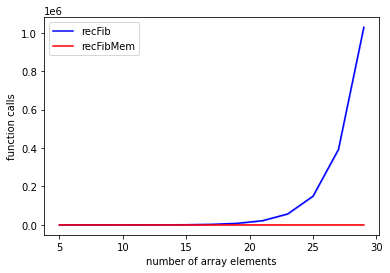

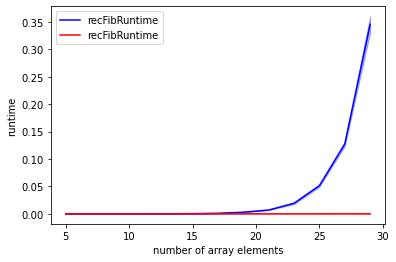

In [48]:
#schrijf hier je code voor opgave 3
from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats

def random_int_array(length):
    array = np.random.randint(0, high=100, size=length, dtype='l')
    return array

def recFib(n):
    recFib.counter += 1
    
    if n == 0:
        return 0
    if n <= 2:
        return 1
    return recFib(n - 2) + recFib(n - 1)

def recFibMem(n, answers):
    recFibMem.counter += 1
    
    if answers == []:
        answers = [-1] * (n + 1)
        answers[0] = 0
        answers[1] = 1
    if answers[n] == -1:
        answers[n] = recFibMem(n - 2, answers) + recFibMem(n - 1, answers)
    return answers[n]


mean_recFib=[]
stdev_recFib=[]
mean_recFibMem=[]
stdev_recFibMem=[]

mean_recFibTime=[]
stdev_recFibTime=[]
mean_recFibMemTime=[]
stdev_recFibMemTime=[]
meetpunten = list(range(5,30,2))

for i in meetpunten: 
    Fib=[]
    FibTime=[]
    FibMem=[]
    FibMemTime=[]
    
    for j in range(0,10):
        recFib.counter = 0
        t1 = time.time()
        res = recFib(i)
        t2 = time.time()
        Fib.append(recFib.counter)
        FibTime.append(t2 - t1)
        
        arr = []
        recFibMem.counter = 0
        t1 = time.time()
        res = recFibMem(i, arr)
        t2 = time.time()
        FibMem.append(recFibMem.counter)
        FibMemTime.append(t2 - t1)

    mean_recFib.append(stats.mean(Fib))
    stdev_recFib.append(stats.stdev(Fib))
    mean_recFibMem.append(stats.mean(FibMem))
    stdev_recFibMem.append(stats.stdev(FibMem))
    
    mean_recFibTime.append(stats.mean(FibTime))
    stdev_recFibTime.append(stats.stdev(FibTime))
    mean_recFibMemTime.append(stats.mean(FibMemTime))
    stdev_recFibMemTime.append(stats.stdev(FibMemTime))
    
plt.plot(meetpunten, mean_recFib, 'b-')
plt.fill_between(meetpunten, np.array(mean_recFib)-np.array(stdev_recFib), np.array(mean_recFib)+np.array(stdev_recFib), color='b', alpha=0.3)
plt.plot(meetpunten, mean_recFibMem, 'r-')
plt.fill_between(meetpunten, np.array(mean_recFibMem)-np.array(stdev_recFibMem), np.array(mean_recFibMem)+np.array(stdev_recFibMem), color='r', alpha=0.3)
plt.xlabel("number of array elements")
plt.ylabel("function calls")
plt.legend(["recFib", "recFibMem"], loc='upper left')
plt.show()

plt.plot(meetpunten, mean_recFibTime, 'b-')
plt.fill_between(meetpunten, np.array(mean_recFibTime)-np.array(stdev_recFibTime), np.array(mean_recFibTime)+np.array(stdev_recFibTime), color='b', alpha=0.3)
plt.plot(meetpunten, mean_recFibMemTime, 'r-')
plt.fill_between(meetpunten, np.array(mean_recFibMemTime)-np.array(stdev_recFibMemTime), np.array(mean_recFibMemTime)+np.array(stdev_recFibMemTime), color='r', alpha=0.3)
plt.xlabel("number of array elements")
plt.ylabel("runtime")
plt.legend(["recFibRuntime", "recFibRuntime"], loc='upper left')
plt.show()

De Tijd complexiteit van recFib is O(2^n) en die van recFibMem is O(n)
De grafieken kloppen ook wel met mijn verwachtingen, je ziet namelijk de deviatie niet aangezien deze altijd 1 is, de functies doen niet in eens een functie call meer of minder aangezien dat gewoon niet kan. 

## Opgave 4: En dan nog een lastig beestje (waarin we **alles** doen)

Schrijf een recursieve functie in Python die uitrekent in hoeveel unieke verschillende combinaties van munten en biljetten een bedrag (in eurocent) betaald kan worden. Maak hierbij gebruik van de euro-munten en biljetten. Dit zijn (in eurocenten):  1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000 and 10000.

Bijvoorbeeld, als wij 7 cent willen betalen zijn er 6 mogelijkheden:
* 7 = 1 + 1 + 1 + 1 + 1 + 1 + 1
* 7 = 1 + 1 + 1 + 1 + 1 + 2
* 7 = 1 + 1 + 1 + 2 + 2
* 7 = 1 + 2 + 2 + 2
* 7 = 1 + 1 + 5
* 7 = 2 + 5

Doe een runtime-complexity analyse. Welke orde van grootte heeft de runtime van de recursieve versie zonder memoïsatie? En mét? Leg je antwoord uit. 

Doe een runtime- óf een aantal-function-calls-meting, en laat het verschil zien tussen met en zonder memoïsatie in een plot (matplotlib.pyplot) als functie van de grootte van het bedrag. Vergeet niet weer meerdere metingen te doen, en de standaardafwijking mee te plotten.  

TIP1: als je bijhoudt hoeveel biljetten en munten er nog beschikbaar zijn, en je steeds de hoogste wegstreept, dan kan je voor de beschikbare biljetten een integer gebruiken als functieparameter
TIP2: voor de recursie moet je nu zowel het aantal nog beschikbare biljetten (en munten) als parameter meegeven, als het resterende bedrag; die moet je dus ook gebruiken in de memoïsatie. 
TIP3: Memoïsatie kan met een array (ook een 2-dimensionale), maar je zou ook een dictionary kunnen gebruiken als lookup table. 

Result (7,13):  6
Function counter: 71
Result (5,13):  4
Function counter: 47
Result (4,13):  3
Function counter: 39

OPTIMISED MEMOISED VERSION

Result (7,13):  6
Function counter: 49
Result (5,13):  4
Function counter: 39
Result (4,13):  3
Function counter: 35


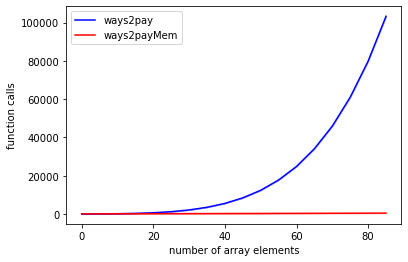

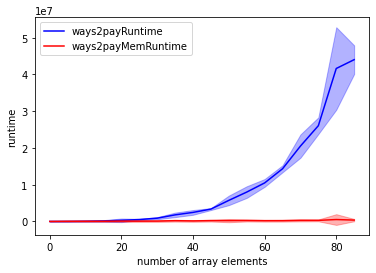

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats

def random_int_array(length):
    array = np.random.randint(0, high=100, size=length, dtype='l')
    return array

def ways2pay(amount, highest_coupon_number=13, coupons=[1,2,5,10,20,50,100,200,500,1000,2000,5000,10000]):
    ways2pay.counter += 1
    
    if(amount == 0):
        return 1
    elif(amount < 0 or highest_coupon_number < 1):
        return 0
    return (
            ways2pay(amount, highest_coupon_number - 1 ) + 
            ways2pay(amount - coupons[highest_coupon_number - 1], highest_coupon_number)
            )        


def ways2payMem(amount, dic, highest_coupon_number=13, coupons=[1,2,5,10,20,50,100,200,500,1000,2000,5000,10000]):
    ways2payMem.counter += 1 
        
    if dic is None: 
        dic = {}    
        
    if (amount, highest_coupon_number) in dic:
        return dic[(amount, highest_coupon_number)]
    
    if(amount == 0):
        answer = 1
    elif(amount < 0 or highest_coupon_number < 1):
        answer = 0
    elif(amount > 0):
        answer = (
                    ways2payMem(amount, dic, highest_coupon_number - 1) + 
                    ways2payMem(amount - coupons[highest_coupon_number - 1], dic, highest_coupon_number)
                 )
    
    dic[(amount, highest_coupon_number)] = answer
    return answer


                              #PLOT CODE
mean_ways2pay=[]
stdev_ways2pay=[]
mean_ways2payMem=[]
stdev_ways2payMem=[]

mean_ways2payTime=[]
stdev_ways2payTime=[]
mean_ways2payMemTime=[]
stdev_ways2payMemTime=[]
meetpunten = list(range(0,90,5))

for i in meetpunten: 
    Pay=[]
    PayTime=[]
    PayMem=[]
    PayMemTime=[]
    
    for j in range(0,60):
        ways2pay.counter = 0
        t1 = time.time_ns()
        res = ways2pay(i)           
        t2 = time.time_ns()
        Pay.append(ways2pay.counter)
        PayTime.append(t2 - t1)
        
        arr = None
        ways2payMem.counter = 0
        t1 = time.time_ns()
        res = ways2payMem(i, arr)   
        t2 = time.time_ns()
        PayMem.append(ways2payMem.counter)
        PayMemTime.append(t2 - t1)

    mean_ways2pay.append(stats.mean(Pay))
    stdev_ways2pay.append(stats.stdev(Pay))
    mean_ways2payMem.append(stats.mean(PayMem))
    stdev_ways2payMem.append(stats.stdev(PayMem))
    
    mean_ways2payTime.append(stats.mean(PayTime))
    stdev_ways2payTime.append(stats.stdev(PayTime))
    mean_ways2payMemTime.append(stats.mean(PayMemTime))
    stdev_ways2payMemTime.append(stats.stdev(PayMemTime))
    
plt.plot(meetpunten, mean_ways2pay, 'b-')
plt.fill_between(meetpunten, np.array(mean_ways2pay)-np.array(stdev_ways2pay), np.array(mean_ways2pay)+np.array(stdev_ways2pay), color='b', alpha=0.3)
plt.plot(meetpunten, mean_ways2payMem, 'r-')
plt.fill_between(meetpunten, np.array(mean_ways2payMem)-np.array(stdev_ways2payMem), np.array(mean_ways2payMem)+np.array(stdev_ways2payMem), color='r', alpha=0.3)
plt.xlabel("number of array elements")
plt.ylabel("function calls")
plt.legend(["ways2pay", "ways2payMem"], loc='upper left')
plt.show()

plt.plot(meetpunten, mean_ways2payTime, 'b-')
plt.fill_between(meetpunten, np.array(mean_ways2payTime)-np.array(stdev_ways2payTime), np.array(mean_ways2payTime)+np.array(stdev_ways2payTime), color='b', alpha=0.3)
plt.plot(meetpunten, mean_ways2payMemTime, 'r-')
plt.fill_between(meetpunten, np.array(mean_ways2payMemTime)-np.array(stdev_ways2payMemTime), np.array(mean_ways2payMemTime)+np.array(stdev_ways2payMemTime), color='r', alpha=0.3)
plt.xlabel("number of array elements")
plt.ylabel("runtime")
plt.legend(["ways2payRuntime", "ways2payMemRuntime"], loc='upper left')
plt.show()


De Runtime complexiteit van de ways2pay functie (zonder memoisatie) heeft een orde van grote van O(2^ n+m ). Dit omdat je voor elke functie call die je doet er automatisch nog 2 doet en je 2 inputs hebt, vandaar n voor amount en m voor het aantal coupons wat je hebt. Per recursieve functie call verminder je bij de ene je amount en bij de andere je coupons vandaar n+m. Met memoisatie is de orde van grote O(n) omdat elke mogelijkheid (amount, highest_coupon_number) nu maar 1 keer berekend wordt, zodra de functie deze waarde nog een keer krijgt kan hij deze gewoon opzoeken in de dictionary. 